In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
data = pd.read_csv('BABA.csv')
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
1,2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2,2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
3,2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
4,2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [48]:
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


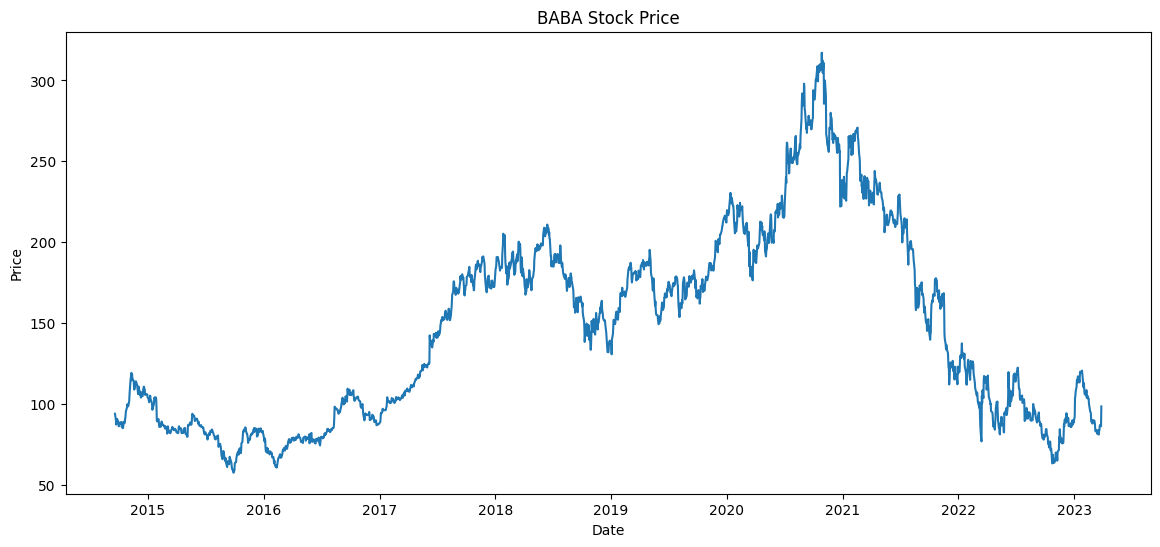

In [49]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'])
plt.title('BABA Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
# calculate 7-day moving average
data['MA7'] = data['Close'].rolling(window=7).mean()

# calculate 21-day moving average
data['MA21'] = data['Close'].rolling(window=21).mean()

# calculate MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2

# calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [51]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [52]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')